In [1]:
# Importing Libraries
try:
    import pandas as pd
    import numpy as np
    import os,sys
    import re
    import matplotlib.pyplot as plt
    # importing algorithms
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn import svm
    from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
    from sklearn.preprocessing import StandardScaler, Normalizer
except Exception as e:
    print("Error is due to",e)
pwd = os.getcwd()
labels_df = pd.read_csv(pwd+"//Datasets//Nisha//Input//Nisha_dataset_labels.csv")

### Verloop BERT Sentence Transformer SVM Model

In [2]:
# V BERT vectorized data
x_df = pd.read_csv(pwd+"//Datasets//Nisha//SentenceTransformers//bert_vectorized_Nisha_dataset_vbert.csv")
y_df = labels_df['Labels']
# Test train split
x_train,x_test,y_train,y_test = train_test_split(x_df, y_df, test_size=0.30,random_state=21,stratify=y_df)

# Normalize scaling of train data
normalize_model = Normalizer()
nscaled_data_train = normalize_model.fit_transform(x_train)
# Normalize scaling of test data
nscaled_data_test = normalize_model.fit_transform(x_test)

# Standard scaling of train data
standard_model = StandardScaler()
sscaled_data_train = standard_model.fit_transform(x_train)
# Standard scaling of test data
sscaled_data_test = standard_model.fit_transform(x_test)

In [3]:
# Modelling according to the hyper parameters for Normalized data

svm_model1 = svm.SVC(C=10, probability=True)

svm_model1.fit(nscaled_data_train, y_train)

# Predicted test outputs
svm_model1_pred = svm_model1.predict(nscaled_data_test)

#print Confusion Matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,svm_model1_pred))
print("*"*100)
# print Classification Report
print("Classification Report: \n", classification_report(y_test, svm_model1_pred))
print("*"*100)

Confusion Matrix: 
 [[172   2   0   1  29   6   0]
 [  5 157   3  15  13  17   0]
 [  0   4 198   7   1   0   0]
 [  1  14   7 149  25  12   2]
 [ 37  11   1  17 134   6   4]
 [ 11  12   6  14   7 136  24]
 [  0   0   0   1   0  27 182]]
****************************************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           1       0.76      0.82      0.79       210
           2       0.79      0.75      0.77       210
           3       0.92      0.94      0.93       210
           4       0.73      0.71      0.72       210
           5       0.64      0.64      0.64       210
           6       0.67      0.65      0.66       210
           7       0.86      0.87      0.86       210

    accuracy                           0.77      1470
   macro avg       0.77      0.77      0.77      1470
weighted avg       0.77      0.77      0.77      1470

***************************************

C:\Users\murth\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


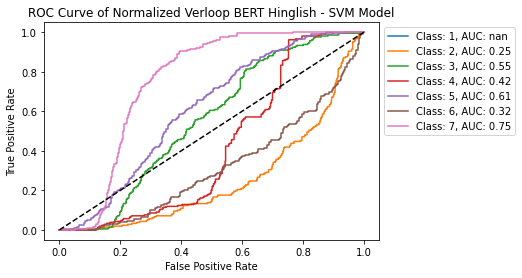

In [4]:
# AUC-ROC Curves
for x in range(7):
    y_score = svm_model1.predict_proba(nscaled_data_test)[:,x]
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score, pos_label=x)
    plt.plot(false_positive_rate, true_positive_rate, 
             label="Class: "+str(x+1)+", AUC: "+str(round(auc(false_positive_rate, true_positive_rate),2)))
plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve of Normalized Verloop BERT Hinglish - SVM Model")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [5]:
# Modelling according to the hyper parameters for Standardized data

svm_model1 = svm.SVC(C=100, gamma='auto', probability=True)

svm_model1.fit(sscaled_data_train, y_train)

# Predicted test outputs
svm_model1_pred = svm_model1.predict(sscaled_data_test)

#print Confusion Matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,svm_model1_pred))
print("*"*100)
# print Classification Report
print("Classification Report: \n", classification_report(y_test, svm_model1_pred))
print("*"*100)

Confusion Matrix: 
 [[174   1   0   1  25   9   0]
 [  3 166   1  10  13  16   1]
 [  0   5 195   7   1   2   0]
 [  1  12   6 148  23  18   2]
 [ 31  10   1  20 134   9   5]
 [  6   9   4  14   3 148  26]
 [  0   0   0   0   1  24 185]]
****************************************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           1       0.81      0.83      0.82       210
           2       0.82      0.79      0.80       210
           3       0.94      0.93      0.94       210
           4       0.74      0.70      0.72       210
           5       0.67      0.64      0.65       210
           6       0.65      0.70      0.68       210
           7       0.84      0.88      0.86       210

    accuracy                           0.78      1470
   macro avg       0.78      0.78      0.78      1470
weighted avg       0.78      0.78      0.78      1470

***************************************

C:\Users\murth\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


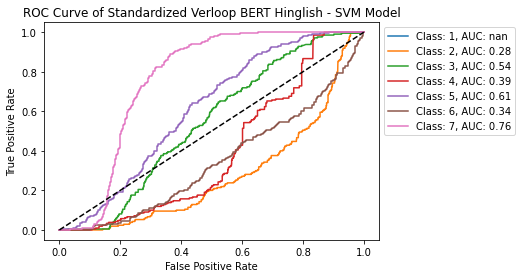

In [6]:
# AUC-ROC Curves
for x in range(7):
    y_score = svm_model1.predict_proba(sscaled_data_test)[:,x]
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score, pos_label=x)
    plt.plot(false_positive_rate, true_positive_rate, 
             label="Class: "+str(x+1)+", AUC: "+str(round(auc(false_positive_rate, true_positive_rate),2)))
plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve of Standardized Verloop BERT Hinglish - SVM Model")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

### XLM Base Sentence Transformer SVM Model

In [7]:
# XLM Base Sentence Transformer vectorized data
x_df = pd.read_csv(pwd+"//Datasets//Nisha//SentenceTransformers//xlm_vectorized_Nisha_dataset.csv")
y_df = labels_df['Labels']
# Test train split
x_train,x_test,y_train,y_test = train_test_split(x_df, y_df, test_size=0.30,random_state=21,stratify=y_df)

# Normalize scaling of train data
normalize_model = Normalizer()
nscaled_data_train = normalize_model.fit_transform(x_train)
# Normalize scaling of test data
nscaled_data_test = normalize_model.fit_transform(x_test)

# Standard scaling of train data
standard_model = StandardScaler()
sscaled_data_train = standard_model.fit_transform(x_train)
# Standard scaling of test data
sscaled_data_test = standard_model.fit_transform(x_test)

In [8]:
# Modelling according to the hyper parameters for Normalized data

svm_model4 = svm.SVC(C=100, gamma=0.1, probability=True)

svm_model4.fit(nscaled_data_train, y_train)

# Predicted test outputs
svm_model4_pred = svm_model4.predict(nscaled_data_test)

#print Confusion Matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,svm_model4_pred))
print("*"*100)
# print Classification Report
print("Classification Report: \n", classification_report(y_test, svm_model4_pred))
print("*"*100)

Confusion Matrix: 
 [[165   0   2   4  29   9   1]
 [  2 176   2  10  11   9   0]
 [  0   6 200   1   1   2   0]
 [  7  14   5 139  22  18   5]
 [ 22  19   0  16 147   2   4]
 [ 17  15   1  15   5 131  26]
 [  0   0   0   3   2  23 182]]
****************************************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           1       0.77      0.79      0.78       210
           2       0.77      0.84      0.80       210
           3       0.95      0.95      0.95       210
           4       0.74      0.66      0.70       210
           5       0.68      0.70      0.69       210
           6       0.68      0.62      0.65       210
           7       0.83      0.87      0.85       210

    accuracy                           0.78      1470
   macro avg       0.77      0.78      0.77      1470
weighted avg       0.77      0.78      0.77      1470

***************************************

C:\Users\murth\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


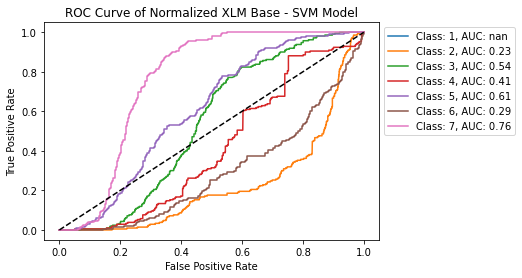

In [9]:
# AUC-ROC Curves
for x in range(7):
    y_score = svm_model4.predict_proba(nscaled_data_test)[:,x]
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score, pos_label=x)
    plt.plot(false_positive_rate, true_positive_rate, 
             label="Class: "+str(x+1)+", AUC: "+str(round(auc(false_positive_rate, true_positive_rate),2)))
plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve of Normalized XLM Base - SVM Model")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [10]:
# Modelling according to the hyper parameters for Standardized data

svm_model2 = svm.SVC(C=1, gamma='auto', probability=True)

svm_model2.fit(sscaled_data_train, y_train)

# Predicted test outputs
svm_model2_pred = svm_model2.predict(sscaled_data_test)

#print Confusion Matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,svm_model2_pred))
print("*"*100)
# print Classification Report
print("Classification Report: \n", classification_report(y_test, svm_model2_pred))
print("*"*100)

Confusion Matrix: 
 [[153   2   1   4  31  16   3]
 [  2 176   1   6   8  15   2]
 [  0   4 194   6   1   5   0]
 [  2  10   5 139  18  34   2]
 [ 15  16   0  15 152   6   6]
 [  3   9   2  16   1 140  39]
 [  0   0   0   0   1  23 186]]
****************************************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           1       0.87      0.73      0.79       210
           2       0.81      0.84      0.82       210
           3       0.96      0.92      0.94       210
           4       0.75      0.66      0.70       210
           5       0.72      0.72      0.72       210
           6       0.59      0.67      0.62       210
           7       0.78      0.89      0.83       210

    accuracy                           0.78      1470
   macro avg       0.78      0.78      0.78      1470
weighted avg       0.78      0.78      0.78      1470

***************************************

C:\Users\murth\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


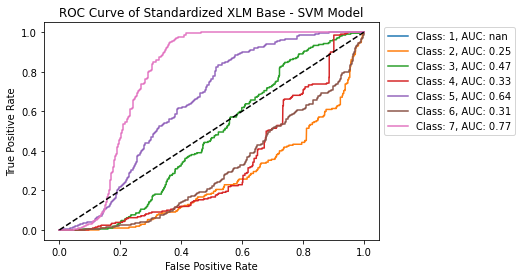

In [11]:
# AUC-ROC Curves
for x in range(7):
    y_score = svm_model2.predict_proba(sscaled_data_test)[:,x]
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score, pos_label=x)
    plt.plot(false_positive_rate, true_positive_rate, 
             label="Class: "+str(x+1)+", AUC: "+str(round(auc(false_positive_rate, true_positive_rate),2)))
plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve of Standardized XLM Base - SVM Model")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()